# <center> TP 4: Kernel Methods <br> Kernel Principal Components Analysis (KPCA)<br>Kernel Linear Discriminant Analysis(KLDA)<br> <small>Réda DEHAK<br> 12 December 2018</small> </center>

The goal of this lab is :
    - Test and use KPCA and [KLDA](https://doc.ml.tu-berlin.de/publications/publications/MikRaeWesSchMue99.pdf)
    
We will use the [optdigits dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/) from UCI. This database is a small set of handwritten digits compared to the MNIST databases. A preprocessing program available by NIST was used to extract 64 features which represent the number of on pixel of nonoverlapping blocks of 4x4 extracted from normalized image. [See](optdigits.names.txt) for more details.

- First, we will use generic data to test our algirthms: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel, linear_kernel
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [2]:
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

- Write a function that fit a KPCA on the X dataset, use the kernel function as a parameter.
- Train a KPCA with linear kernel and compare the result to the classical PCA

In [108]:
def gram(X, D, K):
        n_samples1, n_samples2 = X.shape[0], D.shape[0]
        M = np.zeros((n_samples1, n_samples2))
        for i in range(n_samples1):
            for j in range(n_samples2):
                M[i, j] = K(X[i,:], D[j,:])
        return M
    
def centerGramMatrix(G):
    Mline = np.mean(G, axis=1)
    MCol = np.mean(G, axis=0)
    Mean = np.mean(G[:])
    for i in range(G.shape[0]):
        for j in range(G.shape[1]):
            G[i, j] = G[i, j] - Mline[i] - MCol[j] + Mean
    return G

def KernelPCA(X, K):
    G = gram(X, X, K)
    N = X.shape[0]
    
    #Gc = (np.eye(N) - (np.ones((N, N)) / N)) @ G @ (np.eye(N) - (np.ones((N, N)) / N))
    Gc = centerGramMatrix(G)
    
    lam, u = np.linalg.eigh(Gc)
    indice = np.argsort(lam)[::-1]
    lam = lam[indice]
    u = u[:,indice]
    u = u @ np.diag(1/ np.sqrt(lam))
    
    return u.T @ Gc

kernel = lambda x, x1: np.power(1 + (x.dot(x1.T)), 4)
lin_kern = lambda x, y: x.dot(y)
rbf_ker = lambda x, y: 10 * np.exp(-10 * np.linalg.norm(x - y)**2)
a = KernelPCA(X, rbf_ker)

/Users/berthierhadrien/.local/lib/python3.6/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in sqrt


In [76]:
g = gram(X, X, lin_kern)
gc = centerGramMatrix(g)
cov = np.cov(X.T, bias=True) * X.shape[0]
lam1, v = np.linalg.eigh(cov)
lam2, u = np.linalg.eigh(gc)
u = u @ np.diag(1/ np.sqrt(lam2))
M = np.mean(X, axis=0)
Xc = X - np.ones((400, 1)) @ M.reshape((1, 2))
maxi = np.max(np.abs(gc - Xc @ Xc.T))
print(maxi)
maxi2 = np.max(np.abs(cov - Xc.T @ Xc))
print(maxi2)

3.5160689011959207e-06
4.440892098500626e-16
0.0


/Users/berthierhadrien/.local/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sqrt


In [69]:
print(cov.shape)
print(lam1)
print(lam2[398:400])
print(X.shape)

(2, 2)
[109.55883021 110.8363735 ]
[109.55883021 110.8363735 ]
(400, 2)


In [77]:
print(v)
print(X.T @ u[:,398:400])

[[-0.91043061 -0.41366183]
 [-0.41366183  0.91043061]]
[[-0.91043061  0.41366183]
 [-0.41366183 -0.91043061]]


In [85]:
a = (gc @ u[:, 398:400]).T
print(a.shape)

(2, 400)


In [86]:
reds = y == 0
blues = y == 1

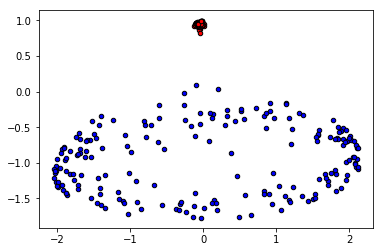

In [109]:
plt.scatter(a[0, reds], a[1, reds], c="red",
            s=20, edgecolor='k')
plt.scatter(a[0, blues], a[1, blues], c="blue",
            s=20, edgecolor='k')

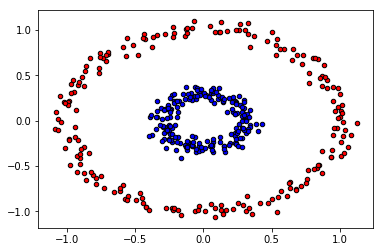

In [113]:
plt.scatter(b[reds, 0], b[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(b[blues, 0], b[blues, 1], c="blue",
            s=20, edgecolor='k')

In [74]:
plt.scatter(c[reds, 0], c[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(c[blues, 0], c[blues, 1], c="blue",
            s=20, edgecolor='k')

NameError: name 'c' is not defined

- Test the result with polynomial and RBF kernels

- Write a function that fit a KLDA on the X dataset, use the kernel function as a parameter.
- Train a KLDA with linear kernel and compare the result to the classical LDA

- Real Data

In [ ]:
dataTrain = pd.read_csv('optdigits.tra', header=None)
dataTest = pd.read_csv('optdigits.tes', header=None)

Xtrain = dataTrain.values[:,0:64]
ytrain = dataTrain.values[:,64]

Xtest = dataTest.values[:,0:64]
ytest = dataTest.values[:,64]

1- Try to use a KPCA of the training data (use different kernel functions)
2- Plot each example of the training data in the first two factorial axis of PCA(2D space), use different color foreach classe? compare with the classical PCA, what did you conclude?

3- Train a logistic regression on the projected data into the $d$ first factorial axis of KPCA, and test the results on the testing data? try different values of $d$?    

4- We will try a Kernel Linear Discriminant Analysis method to separate the 10 classes. Train a Kernel Linear Discriminant Analysis on the training data and plot each example in the 2d plan corresponding to the two axis with largest eigen values? what did you conclude? (use different kernel functions)   

5- Train a logistic regression on the projected data into the $d$ first axis of KLDA? what did you remark and how to solve this problem?

6- Test the results on the testing data? try different values of $𝑑$? what did you conclude?

7- Do the same task with the MNIST dataset?